In [67]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [68]:
def computeCost(X, y, w, b, lambda_):
    m  = X.shape[0]
    cost= (1/(m))*np.sum(((np.dot(X,w)+b)-y)**2)
    reg_cost=(lambda_/(m))*np.sum(w**2)
    
    total_cost = cost + reg_cost           
    return total_cost

def compute_fx_function(X,w,b):
  return np.dot(X,w)+b


def gradient(X,y,w,b,lambda_,t):
    m=X.shape[0]

    temp=X
    for i in range(2,t+1):
      temp=np.append(temp,X**i,axis=1)
    X=temp

    dJ_dw= 2*(np.dot(((np.dot(X,w)+b)-y),X))/m
    dJ_db= 2*(np.sum((np.dot(X,w)+b)-y))/m

    dJ_dw=dJ_dw + (lambda_/m)*w

    return dJ_dw,dJ_db

def descent_grad(X,y,alpha,iters,lambda_,t):
    w=np.zeros(t)
    b=0
    for i in range(iters):
        dJ_dw,dJ_db=gradient(X,y,w,b,lambda_,t)
        
        w=w-alpha*dJ_dw
        b=b-alpha*dJ_db
    print(w,b)
        
    return w,b

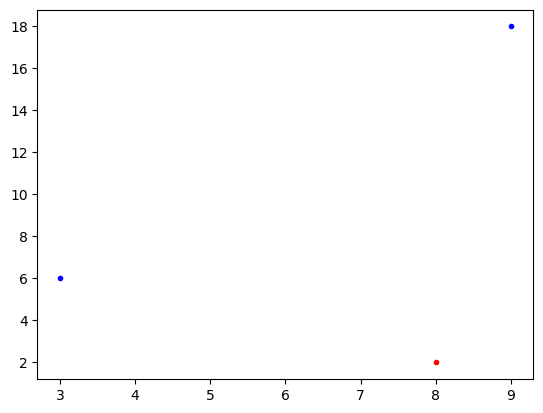

In [69]:
#X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
#y_train = np.array([460, 232, 178])

#y=list()
#X=np.linspace(0, 1, 100).reshape(-1,1)

#for i in X:
#    y.append(math.sin(2*(math.pi)*i))
#y=np.array(y)
lambda_=0
X=np.array([3,9]).reshape(-1,1)
y=np.array([6,18])

X_test=np.array([8]).reshape(-1,1)
y_test=np.array([2])
plt.plot(X,y,'b.')
plt.plot(X_test,y_test,'r.')

In [70]:
descent_grad(X,y,0.01,10000,lambda_,1)

[2.] 2.216667541583438e-15


(array([2.]), 2.216667541583438e-15)

In [71]:
def descGradPoly(X,y,alpha,iters,lambda_,t):
  XX=X
  w,b=descent_grad(X,y,alpha,iters,lambda_,t)
  temp=X
  for i in range(2,t+1):
      temp=np.append(temp,X**i,axis=1)
  X=temp
  y_pred=compute_fx_function(X,w,b)
  plt.plot(XX,y_pred,'r-')


  return computeCost(X_test,y,w,b,lambda_)

[2.] 2.216667541583438e-15


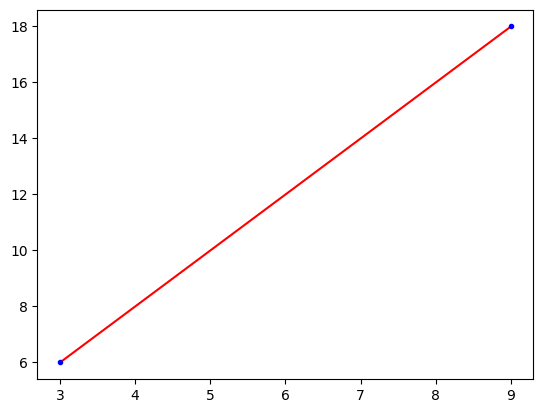

In [72]:
descGradPoly(X,y,0.01,10000,0,1)
plt.plot(X,y,'b.')

[2.] 2.216667541583438e-15
[1.94011976] 0.35928143712573896
[1.88372093] 0.6976744186046395
[1.83050847] 1.0169491525423493
[1.78021978] 1.3186813186812913
[1.73262032] 1.6042780748662833
[1.6875] 1.8749999999999765
[1.64467005] 2.1319796954314265
[1.6039604] 2.3762376237623304
[1.56521739] 2.6086956521738673


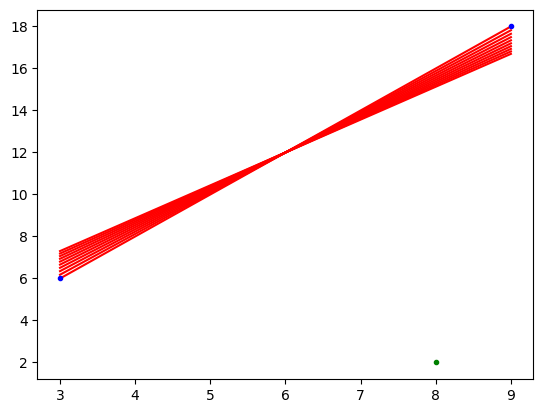

In [73]:
lambda_list=np.linspace(0, 10, 10)
cost=list()
for i in lambda_list:
  cost.append(descGradPoly(X,y,0.01,10000,i,1))

plt.plot(X,y,'b.')
plt.plot(X_test,y_test,'g.')

In [74]:
cost

[103.99999999999997,
 106.29481157445593,
 108.27257977285024,
 109.97529445561626,
 111.43871513102289,
 112.69341416683358,
 113.76562500000009,
 114.67793553041837,
 115.44985785707301,
 116.09829867674878]

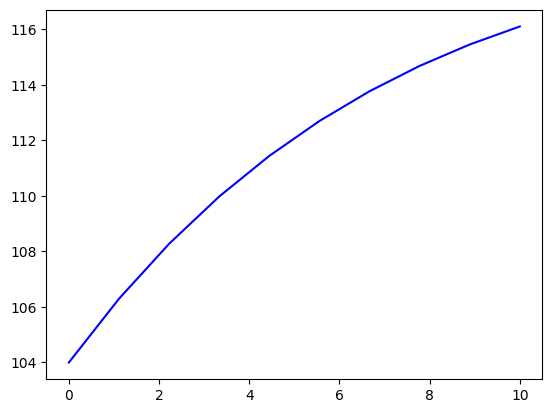

In [75]:
plt.plot(lambda_list,cost,'b-')